
**Quantiles divide a dataset into equal-sized intervals.**

For example:

- Median (Q2): The 50th percentile (middle value).\n
- Quartiles (Q1, Q2, Q3): Divide data into 4 parts.\n
- Percentiles: Divide data into 100 parts.\n
- They help understand the distribution and spread of data.\n

[17.25 19.5  21.75]


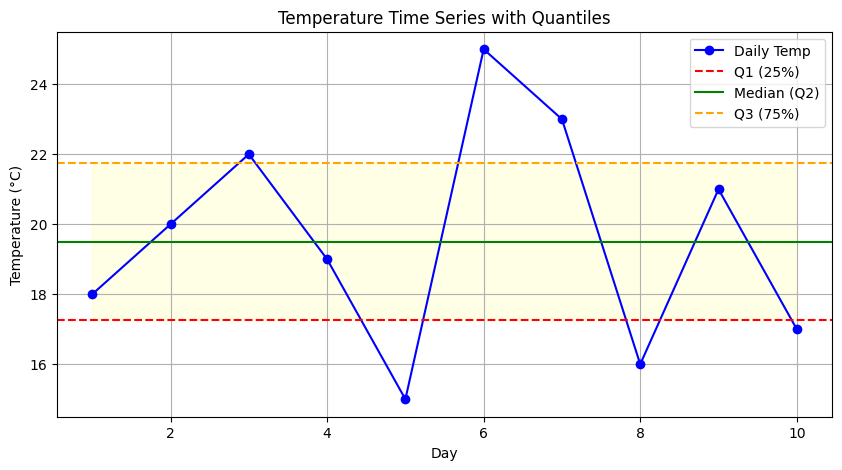

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example time series data
days = np.arange(1, 11)
temps = np.array([18, 20, 22, 19, 15, 25, 23, 16, 21, 17])

# Create DataFrame
df = pd.DataFrame({"Day": days, "Temperature": temps})

# Ensure columns are numeric (convert if needed)
df["Day"] = pd.to_numeric(df["Day"])
df["Temperature"] = pd.to_numeric(df["Temperature"])

# Calculate quantiles (explicitly convert to NumPy array)
quantiles = df["Temperature"].quantile([0.25, 0.5, 0.75]).to_numpy()

print(quantiles)

# Plot
plt.figure(figsize=(10, 5))

# Plot time series (ensure data is 1D)
plt.plot(
    df["Day"].values,  # <-- Explicitly use .values or .to_numpy()
    df["Temperature"].values,
    "bo-",
    label="Daily Temp"
)

# Add quantile lines
plt.axhline(y=quantiles[0], color="r", linestyle="--", label="Q1 (25%)")
plt.axhline(y=quantiles[1], color="g", linestyle="-", label="Median (Q2)")
plt.axhline(y=quantiles[2], color="orange", linestyle="--", label="Q3 (75%)")

# Shade interquartile range (IQR)
plt.fill_between(
    df["Day"].values,  # <-- Explicit conversion
    quantiles[0],
    quantiles[2],
    alpha=0.1,
    color="yellow"
)

plt.title("Temperature Time Series with Quantiles")
plt.xlabel("Day")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()
plt.show()

**Tasks**

1. **Generate/Sample Time Series Data**
Use the provided synthetic dataset or your own (stock prices, temperature, sales, etc.).

2. **Compute and Plot Quantiles**
Calculate quartiles (Q1, Q2, Q3) and the Interquartile Range (IQR).

Plot the time series with quantile lines.

Highlight the IQR region (between Q1 and Q3).

3. **Detect Outliers**
Identify outliers using the 1.5×IQR rule:

Lower Bound = Q1 – 1.5×IQR

Upper Bound = Q3 + 1.5×IQR

Mark outliers on the plot.

4. **Compare Different Quantiles**
Compute deciles (10%, 20%, ..., 90%) and plot them.

Compare with quartiles—does the distribution change?

5. **Rolling Quantiles (Advanced)**
Compute rolling median (Q2) and rolling IQR over a window (e.g., 7 days).

Plot rolling quantiles to see trends.
"""

In [5]:
# Your solution to task 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate time series data, 30 points, normally distributed mu=60 sigma=10
np.random.seed(0)
dates = pd.date_range("2025-07-01", periods=30)
temperature = np.random.normal(loc=60, scale=10, size=30).round(0)

#Replace data with an outlier (3 standard deviations)
temperature[4] = 90

df = pd.DataFrame({"date": dates, "Temperature": temperature})
print(df.head())

        date  Temperature
0 2025-07-01         78.0
1 2025-07-02         64.0
2 2025-07-03         70.0
3 2025-07-04         82.0
4 2025-07-05         90.0


<function matplotlib.pyplot.show(close=None, block=None)>

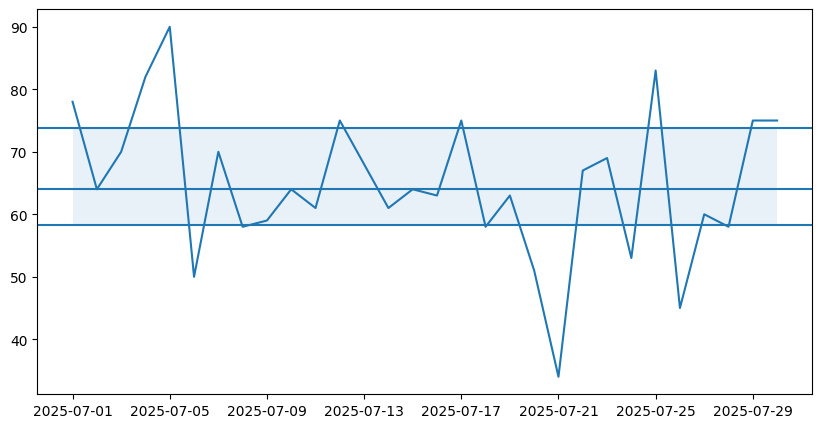

In [6]:


# Your solution to task 2
quartiles = df["Temperature"].quantile([0.25, 0.5, 0.75]).to_numpy()
iqr = (quartiles[2] - quartiles[0])

plt.figure(figsize = (10, 5))

plt.plot(dates, temperature)

plt.axhline(y= quartiles[0])
plt.axhline(y= quartiles[1])
plt.axhline(y= quartiles[2])

plt.fill_between(x= dates, y1=quartiles[0], y2=quartiles[2], alpha=0.1)

plt.show

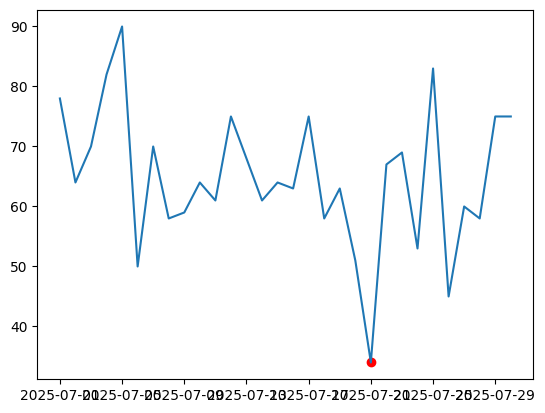

In [9]:
# Solution to task 3
plt.plot(dates, temperature)

outliers = df[(df["Temperature"] < quartiles[0] - 1.5 * iqr)
              | (df["Temperature"] > quartiles[2] + 1.5 * iqr)]
plt.scatter(
    outliers["date"],
    outliers["Temperature"],
    c='red'
    )

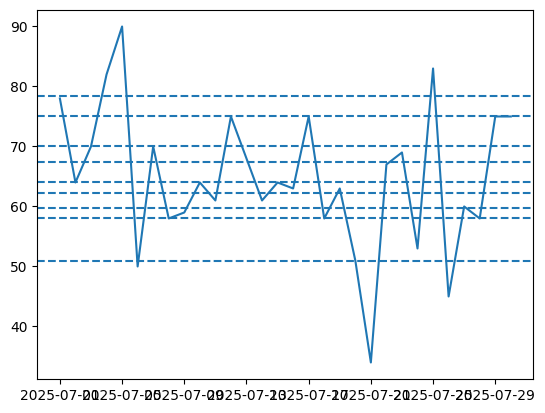

In [10]:
# Solution to task 4
plt.plot(dates, temperature)

#Calculate deciles and store into numpy array
deciles = np.quantile(df["Temperature"], q= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

#Plot deciles
plt.axhline(y=deciles[0], linestyle="--")
plt.axhline(y=deciles[1], linestyle="--")
plt.axhline(y=deciles[2], linestyle="--")
plt.axhline(y=deciles[3], linestyle="--")
plt.axhline(y=deciles[4], linestyle="--")
plt.axhline(y=deciles[5], linestyle="--")
plt.axhline(y=deciles[6], linestyle="--")
plt.axhline(y=deciles[7], linestyle="--")
plt.axhline(y=deciles[8], linestyle="--")

#Just as the quartiles have a greater range of values at the top half, deciles also follow the same pattern. The concentration of values, however, is far more easily depicted and comprehensible

<Axes: xlabel='None'>

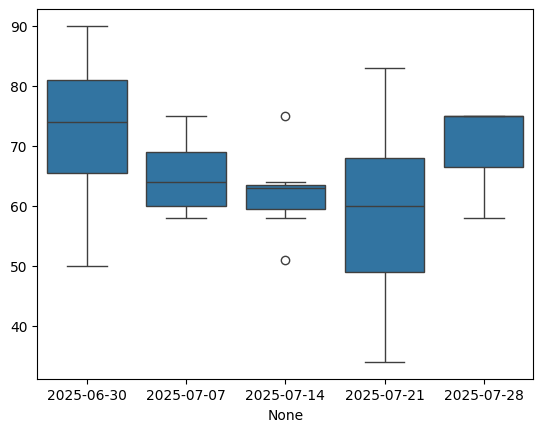

In [19]:
#Bonus Challenge
#Use Seaborn for a boxplot over time:
import seaborn as sns

time_series = pd.Series(temperature, index=dates, name="Temperature")
week = time_series.index.to_period("W")
sns.boxplot(x=week, y=time_series.values)